In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import ensemble
from scipy import stats
%matplotlib inline

In [4]:
data = pd.read_csv("C:/Users/Acer/Desktop/ML/adult.csv")

In [5]:
data.shape

(48842, 15)

# Cleaning Data and Imputing Miscoded Values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
que = ["?"]
data["workclass"] = data["workclass"].replace(que,np.nan)
data["occupation"] = data["occupation"].replace(que,np.nan)
data["native-country"] = data["native-country"].replace(que,np.nan)
data.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [8]:
data['workclass'].fillna("Private",inplace=True)
data['occupation'].fillna("Prof-specialty",inplace=True)
data['native-country'].fillna("United-States",inplace=True)

# Visualization of Numerical(quantitative) and Categorical variables 

In [9]:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index([u'workclass', u'education', u'marital-status', u'occupation',
       u'relationship', u'race', u'gender', u'native-country', u'income'],
      dtype='object')


In [10]:
quantitative = data.select_dtypes(include = ["int64"]).keys()
print(quantitative)

Index([u'age', u'fnlwgt', u'educational-num', u'capital-gain', u'capital-loss',
       u'hours-per-week'],
      dtype='object')


In [11]:
data[quantitative].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCF9518>,
      dtype=object)

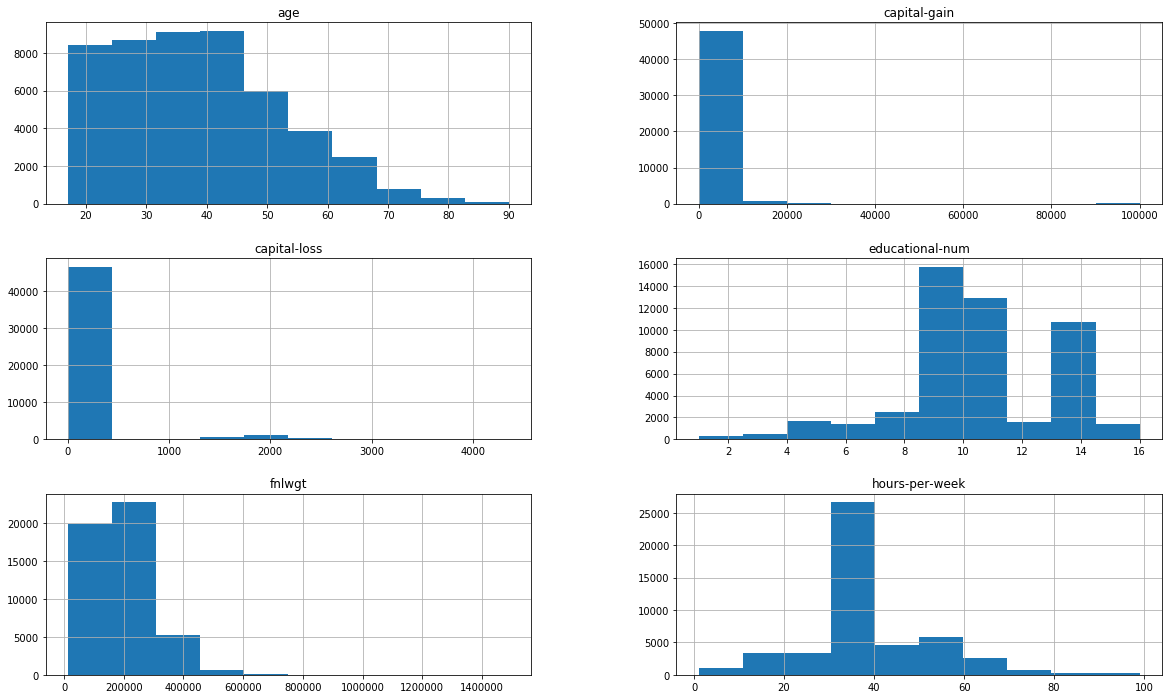

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 12
data[quantitative].hist()

## Categorical variables - Feature engineering.

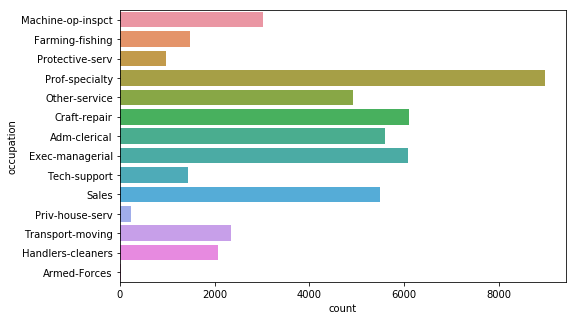

In [13]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['occupation'])

In [14]:
data['occupation']=data['occupation'].astype(dtype='category')
data['occupation'].cat.categories
data['occupation_new']=data['occupation'].cat.codes
data.drop(['occupation'],axis=1,inplace=True)
data.shape

(48842, 15)

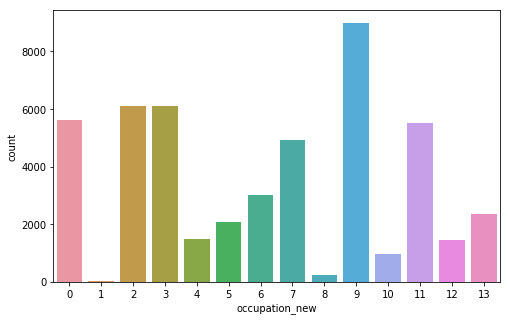

In [15]:
#data["occupation_new"] = pd.qcut(data.occupation_new,q= 8,labels = False)
#df1["Categorical_fare"] = pd.qcut(df1.Fare,q= 4,labels = False)
#df1
rcParams['figure.figsize'] = 8, 5

#data.drop(np.where(data['occupation_new']=='1'))
sns.countplot(data['occupation_new'])

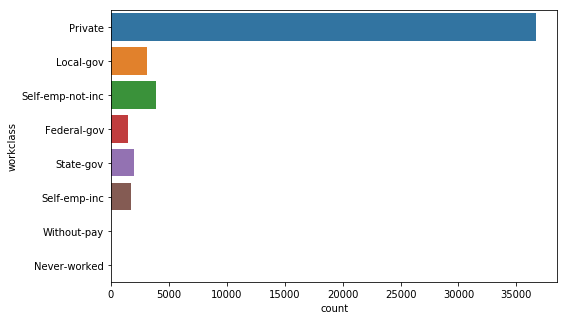

In [16]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['workclass'])

In [17]:
data['workclass'] = np.where(data['workclass']=='Private', '1', '0')
data['workclass'] = data['workclass'].astype(dtype='int64')
data.shape

(48842, 15)

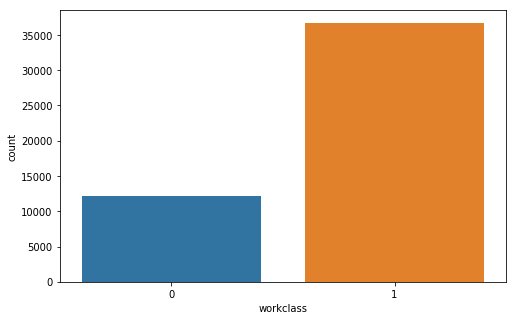

In [18]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['workclass']) 

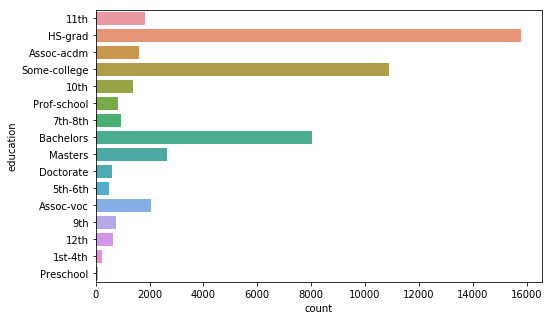

In [19]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['education'])

In [20]:
data['education']=data['education'].astype(dtype='category')
data['education'].cat.categories
data['education_new']=data['education'].cat.codes
data.drop(['education'],axis=1,inplace=True)
data.shape

(48842, 15)

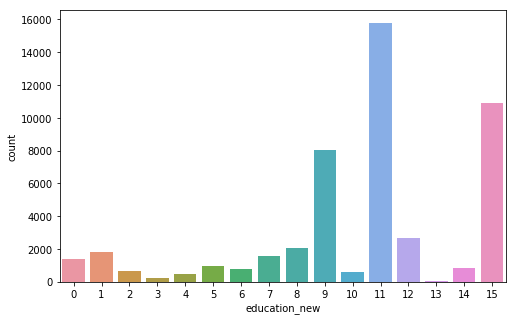

In [21]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['education_new']) 

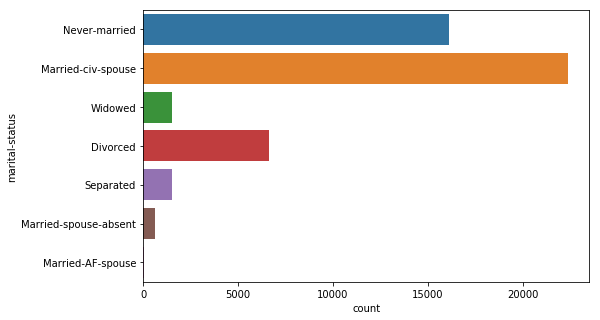

In [22]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['marital-status'])

In [23]:
data['marital-status']=data['marital-status'].astype(dtype='category')
data['marital-status'].cat.categories
data['marital-status-new']=data['marital-status'].cat.codes
data.drop(['marital-status'],axis=1,inplace=True)
data.shape

(48842, 15)

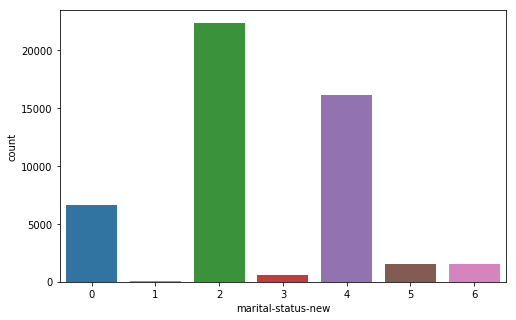

In [24]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['marital-status-new'])

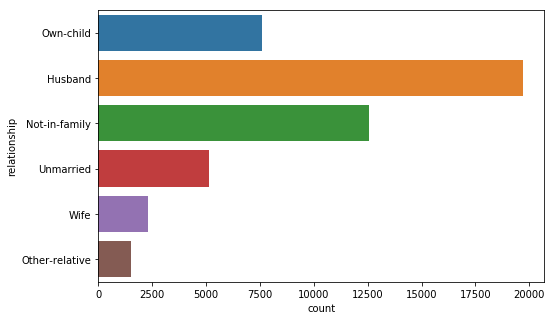

In [25]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['relationship'])

In [26]:
data['relationship']=data['relationship'].astype(dtype='category')
data['relationship'].cat.categories
data['relationship-new']=data['relationship'].cat.codes
data.drop(['relationship'],axis=1,inplace=True)
data.shape

(48842, 15)

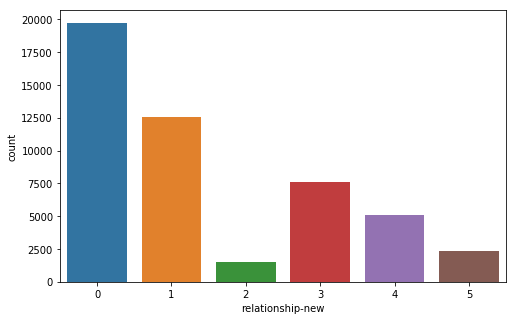

In [27]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['relationship-new'])

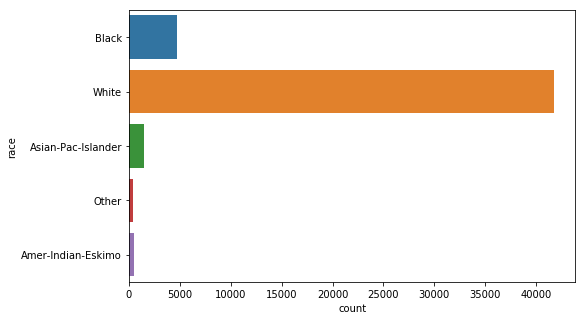

In [28]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['race'])

In [29]:
data['race'] = np.where(data['race']=='White', '1', '0')
data['race'] = data['race'].astype(dtype='int64')
data.shape

(48842, 15)

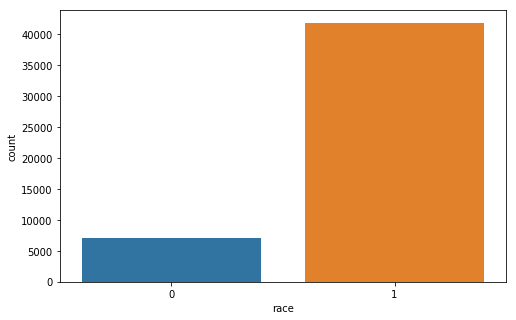

In [30]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['race'])

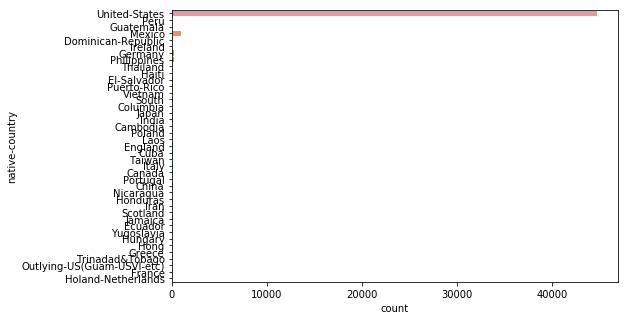

In [31]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(y=data['native-country'])

In [32]:
data['native-country'] = np.where(data['native-country']=='United-States', '1', '0')
data['native-country'] = data['native-country'].astype(dtype='int64')
data.shape

(48842, 15)

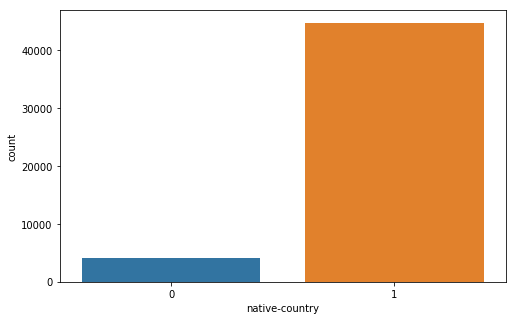

In [33]:
rcParams['figure.figsize'] = 8, 5
sns.countplot(data['native-country'])

# EDA

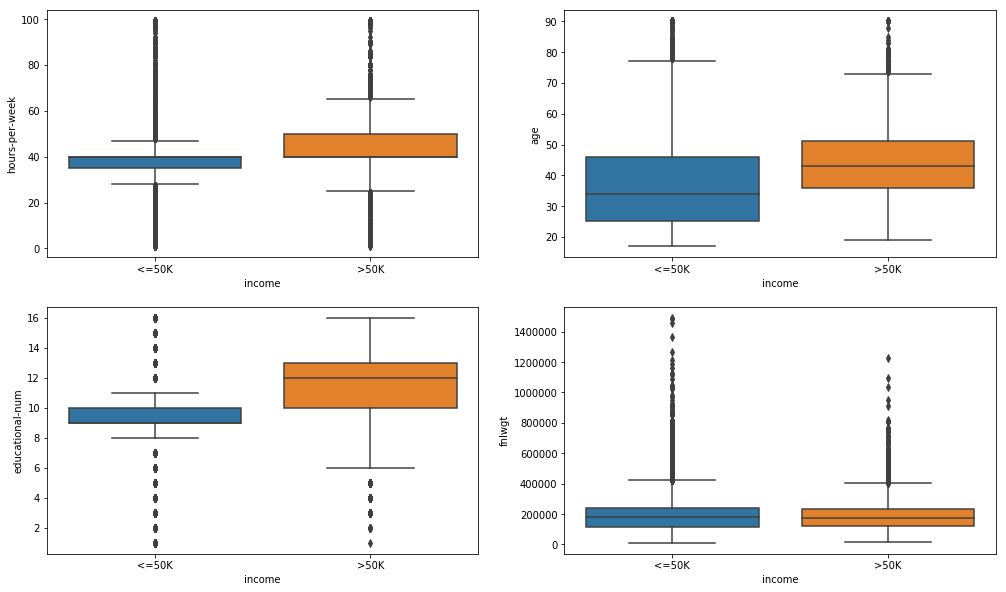

In [34]:
fig, ((a,b),(c,d))= plt.subplots(2,2, figsize=(17,10))
sns.boxplot(y='hours-per-week',x='income',data=data,ax=a)
sns.boxplot(y='age',x='income',data=data,ax=b)
sns.boxplot(y='educational-num',x='income',data=data,ax=c)
sns.boxplot(y='fnlwgt',x='income',data=data,ax=d)

In [35]:
data.drop(data[data['age']>=73].index,axis=0,inplace=True)
data.drop(data[data['hours-per-week']>=65].index,axis=0,inplace=True)
data.drop(data[data['hours-per-week']<=25].index,axis=0,inplace=True)
data.drop(data[data['educational-num']<=5].index,axis=0,inplace=True)
data.drop(data[data['fnlwgt']>=390000].index,axis=0,inplace=True)
#data["fnlwgt"] = pd.qcut(data.fnlwgt,q= 22,labels = False)
#data["age"] = pd.qcut(data.age,q= 8,labels = False)

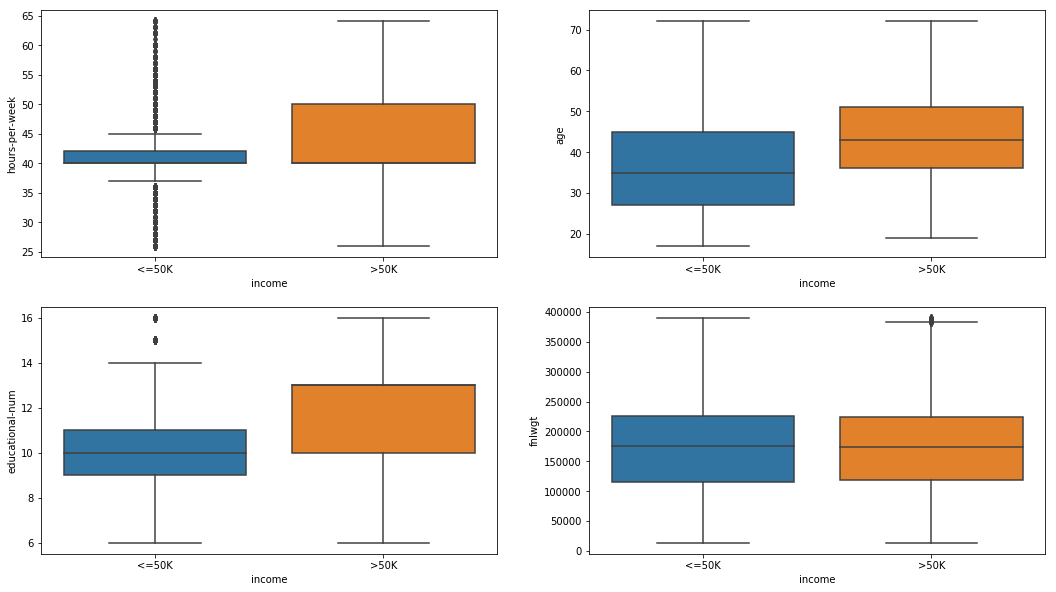

In [36]:
fig, ((a,b),(c,d))= plt.subplots(2,2, figsize=(18,10))
sns.boxplot(y='hours-per-week',x='income',data=data,ax=a)
sns.boxplot(y='age',x='income',data=data,ax=b)
sns.boxplot(y='educational-num',x='income',data=data,ax=c)
sns.boxplot(y='fnlwgt',x='income',data=data,ax=d)

In [37]:
data['gender'] = np.where(data['gender']=='Male', '1', '0')
data['gender'] = data['gender'].astype(dtype='int64')
data.shape

(37329, 15)

In [38]:
data['income'] = np.where(data['income']=='>50K', '1', '0')
data['income'] = data['income'].astype(dtype='int64')
data.shape

(37329, 15)

In [39]:
data.columns

Index([u'age', u'workclass', u'fnlwgt', u'educational-num', u'race', u'gender',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income', u'occupation_new', u'education_new', u'marital-status-new',
       u'relationship-new'],
      dtype='object')

# EDA Report
#### * After performing EDA i had came to a conclusion that features like 'age','fnlwgt','educational-num','hours-per-week' had outliers so, i removed them from the dataset.
#### * And there were also some categorical features in the dataset so i had converted them into numeical featured with which i can easily correlate the target variablee i.e, 'INCOME' .

# Understanding correlation b/w different features

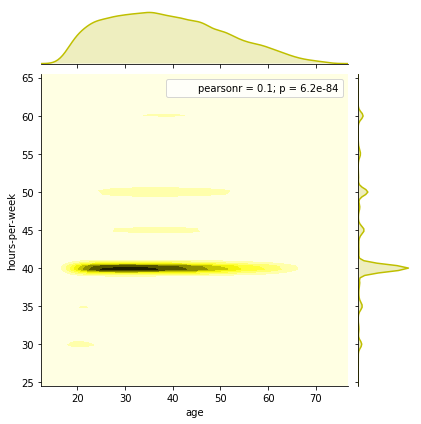

In [40]:
sns.jointplot(data['age'],data['hours-per-week'],kind='kde',color='y',data=data)

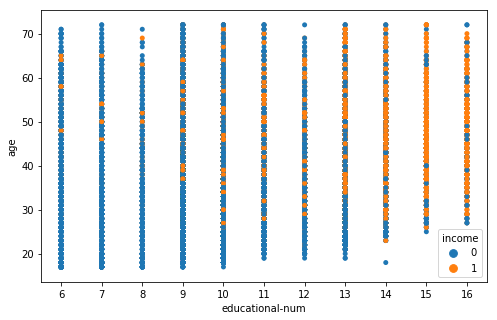

In [41]:
sns.stripplot(data['educational-num'],data['age'],hue=data['income'],data=data)

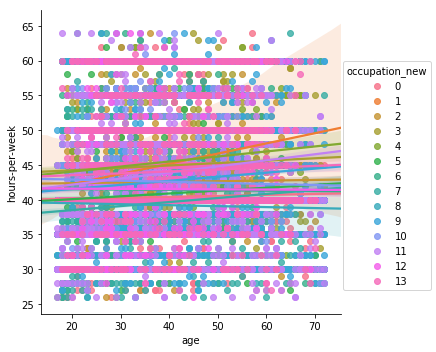

In [42]:
sns.lmplot(x="age", y="hours-per-week", data=data, hue="occupation_new")

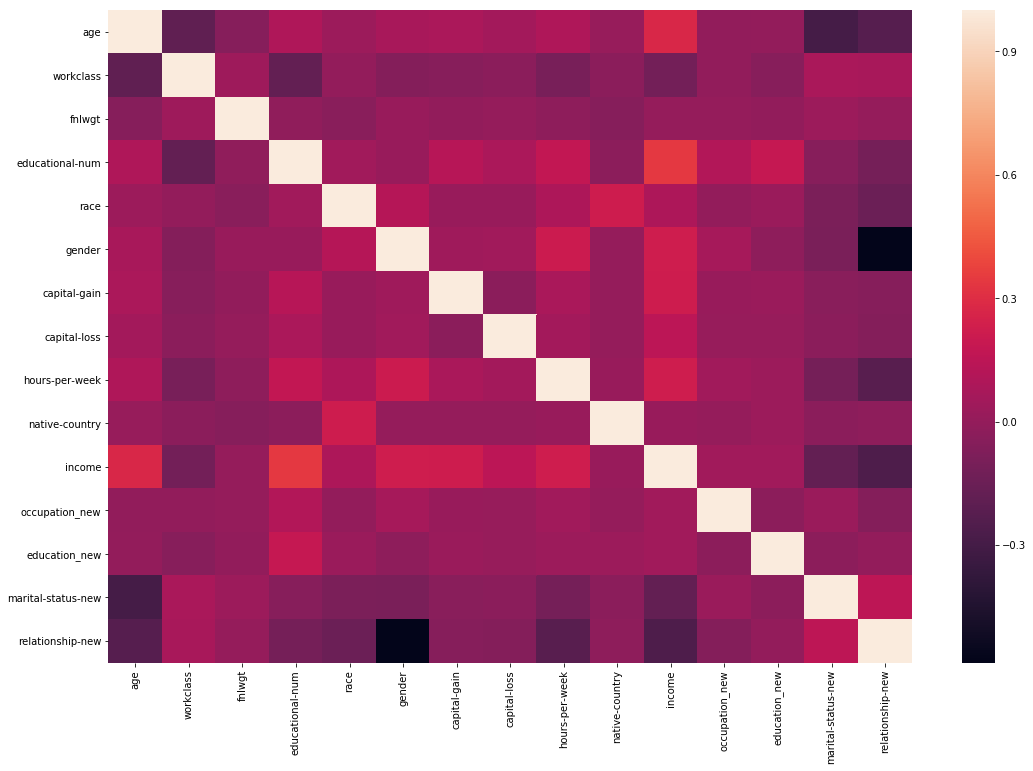

In [43]:
corr = data.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr)

In [44]:
X = data.drop(['income'],axis=1)    
Y = data['income']

In [45]:
data.dtypes

age                   int64
workclass             int64
fnlwgt                int64
educational-num       int64
race                  int64
gender                int64
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country        int64
income                int64
occupation_new         int8
education_new          int8
marital-status-new     int8
relationship-new       int8
dtype: object

# Feature engineering to extract the correct features for the model

In [46]:
X = (X-X.min())/(X.max()-X.min())
X.head()

,age,workclass,fnlwgt,educational-num,race,gender,capital-gain,capital-loss,hours-per-week,native-country,occupation_new,education_new,marital-status-new,relationship-new
0,0.145455,1.0,0.566317,0.1,0.0,1.0,0.000000,0.0,0.368421,1.0,0.461538,0.066667,0.666667,0.6
1,0.381818,1.0,0.202154,0.3,1.0,1.0,0.000000,0.0,0.631579,1.0,0.307692,0.733333,0.333333,0.0
2,0.200000,0.0,0.859131,0.6,1.0,1.0,0.000000,0.0,0.368421,1.0,0.769231,0.466667,0.333333,0.0
3,0.490909,1.0,0.389592,0.4,0.0,1.0,0.076881,0.0,0.368421,1.0,0.461538,1.000000,0.333333,0.0
4,0.018182,1.0,0.238529,0.4,1.0,0.0,0.000000,0.0,0.105263,1.0,0.692308,1.000000,0.666667,0.6


In [47]:
X.var()

age                   0.048032
workclass             0.188276
fnlwgt                0.049291
educational-num       0.045496
race                  0.121595
gender                0.215606
capital-gain          0.005789
capital-loss          0.009074
hours-per-week        0.031962
native-country        0.065193
occupation_new        0.096238
education_new         0.055976
marital-status-new    0.061573
relationship-new      0.101642
dtype: float64

In [48]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.005)
X = selector.fit_transform(X)
X.shape,Y.shape

((37329L, 14L), (37329L,))

In [49]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.145455,1.0,0.566317,0.1,0.0,1.0,0.000000,0.0,0.368421,1.0,0.461538,0.066667,0.666667,0.6
1,0.381818,1.0,0.202154,0.3,1.0,1.0,0.000000,0.0,0.631579,1.0,0.307692,0.733333,0.333333,0.0
2,0.200000,0.0,0.859131,0.6,1.0,1.0,0.000000,0.0,0.368421,1.0,0.769231,0.466667,0.333333,0.0
3,0.490909,1.0,0.389592,0.4,0.0,1.0,0.076881,0.0,0.368421,1.0,0.461538,1.000000,0.333333,0.0
4,0.018182,1.0,0.238529,0.4,1.0,0.0,0.000000,0.0,0.105263,1.0,0.692308,1.000000,0.666667,0.6


# Trying different classifiers and comparing accuracies of all the classifiers

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

## Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=5)
reg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=5, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
pred_lr = reg.predict(X_test)

In [147]:
lracc = reg.score(X_test,Y_test)*100
lracc

81.47602464505759

## Support Vector Machine

In [148]:
from sklearn import metrics
from sklearn.svm import SVC

In [ ]:
model_SVM = SVC(C=0.5,gamma=5)

In [154]:
model_SVM.fit(X_train,Y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [155]:
pred_SVM = model_SVM.predict(X_test)

In [156]:
svmacc = metrics.accuracy_score(Y_test,pred_SVM)*100
svmacc

82.5475488882936

## Naive Bayes
### Gaussian NB

In [188]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [189]:
model_G_NB = GaussianNB()
model_G_NB.fit(X_train,Y_train)

GaussianNB(priors=None)

In [190]:
pred_G_NB = model_G_NB.predict(X_test)
gnbacc = metrics.accuracy_score(Y_test,pred_G_NB)*100
gnbacc

79.03830699169568

### BernoulliNB

In [182]:
from sklearn.naive_bayes import BernoulliNB

In [183]:
model_B_NB = BernoulliNB()
model_B_NB.fit(X_train,Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [184]:
pred_B_NB = model_B_NB.predict(X_test)
metrics.accuracy_score(Y_test,pred_B_NB)*100

73.42619876774712

## Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [192]:
a = DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
a.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [193]:
a_pred = a.predict(X_test)
metrics.accuracy_score(Y_test,a_pred)*100

79.38655237074738

### Using Entropy

In [194]:
a1 = DecisionTreeClassifier(criterion="entropy") #max_leaf_nodes=12 #random_state=1
a1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [195]:
a1_pred1 = a1.predict(X_test)
dtcacc = metrics.accuracy_score(Y_test,a1_pred1)*100
dtcacc

79.56067506027324

## Random Forest

In [196]:
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [197]:
b_pred = b.predict(X_test)
metrics.accuracy_score(Y_test,b_pred)*100

83.4315563889633

### Using Entropy

In [198]:
b1 = RandomForestClassifier(criterion="entropy",max_leaf_nodes=14)
b1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [199]:
b1_pred1 = b1.predict(X_test)
rfcacc = metrics.accuracy_score(Y_test,b1_pred1)*100
rfcacc

83.47173854808464

## Ensemble
### Bagging Classifier

In [200]:
from sklearn.ensemble import BaggingClassifier

In [201]:
bagging = BaggingClassifier(max_samples=0.5,max_features=0.5)
bagging.fit(X_train,Y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=0.5, max_samples=0.5,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [202]:
pred_E_BC = bagging.predict(X_test)
metrics.accuracy_score(Y_test,pred_E_BC)*100

83.47173854808464

### Gradient Boosting Classifier

In [203]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
model_E_GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)
model_E_GBC.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [204]:
pred_E_GBC = model_E_GBC.predict(X_test)
gbcacc = metrics.accuracy_score(Y_test,pred_E_GBC)*100
gbcacc

85.60139298151621

In [205]:
df1 = pd.DataFrame({'Actual':Y_test,'Predicted':pred_E_GBC})
df1.head()

,Actual,Predicted
4659,1,0
38416,0,0
47303,0,0
44150,0,0
10392,0,0


### Voting Classifier

In [160]:
from sklearn.ensemble import VotingClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = SVC()

In [161]:
model_E_VC = VotingClassifier(estimators=[('DT',model1),('LR',model2),('SVC',model3)])
model_E_VC.fit(X_train,Y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [162]:
pred_E_VC = model_E_VC.predict(X_test)
metrics.accuracy_score(Y_test,pred_E_VC)*100

C:\Users\Acer\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


82.4671845700509

## K Nearest Neighbors

In [112]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [113]:
pred_KNN = model_KNN.predict(X_test)
knnacc = model_KNN.score(X_test,Y_test)*100
knnacc

81.26171979641039

## Principal Component Analysis

In [172]:
x = preprocessing.scale(X)
x.shape

(37329L, 14L)

In [173]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalComponents

array([[-2.33533245, -2.11582861,  1.37729875, ...,  0.49428308,
         1.16170824,  0.47832351],
       [ 0.98011544, -1.05609731, -0.71750952, ...,  0.25787012,
        -0.20651294, -1.08548605],
       [ 0.97343502, -0.49170852,  0.87576056, ..., -0.08484655,
         0.35028625,  1.64473449],
       ...,
       [ 0.52393351, -1.1548582 , -0.52243375, ...,  0.14481538,
        -0.19108394, -0.26402727],
       [-2.1238467 ,  0.66567034, -1.23197227, ...,  0.04844376,
        -0.36792697, -0.29554177],
       [-1.02449952,  2.22741339, -0.99067758, ...,  0.91455584,
        -0.6553901 ,  2.05090234]])

In [174]:
x = principalComponents
y = Y
x.shape , y.shape

((37329L, 7L), (37329L,))

In [175]:
reg_PCA = LogisticRegression()
reg_PCA.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
pred_PCA = reg.predict(X_test)
pcaacc = metrics.accuracy_score(Y_test,pred_PCA)*100
pcaacc

81.47602464505759

## Accuracy Score VS Algorithms Graph

In [206]:
accuracyScore = [knnacc, dtcacc , rfcacc , gbcacc , pcaacc , svmacc , gnbacc , lracc]
algoName = ['KNN', 'DT', 'RF' , 'GBC', 'PCA' , 'SVM' , 'Gau_NB' , 'LR']

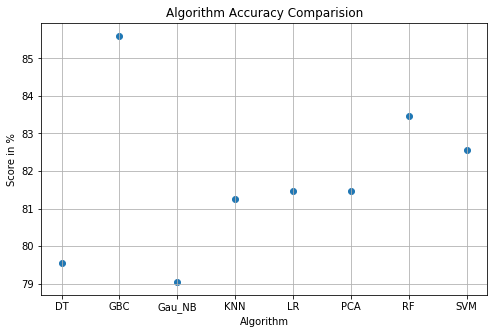

In [207]:
plt.scatter(algoName, accuracyScore)
plt.grid()
plt.title('Algorithm Accuracy Comparision')
plt.xlabel('Algorithm')
plt.ylabel('Score in %')
plt.show()